In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
from tensorflow.keras.datasets import mnist

In [117]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

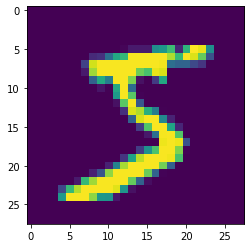

In [118]:
plt.imshow(X_train[0])
#shows full array converted to image

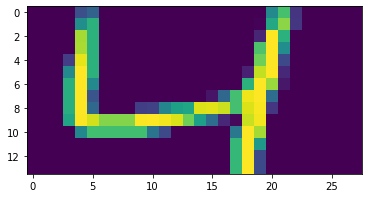

In [119]:
plt.imshow(X_train[2][6:20])
#show only the part of image in the set rage 6 to 20

In [120]:
print(len(X_train[0]))
print(len(X_train[0][0]))
#images are 28 x 28 pixels

28
28


In [121]:
zero_images = X_train[y_train==0]
#as y train and test are arrays with the correct numbers which x train and test images should graphically represent, so by y_train==0 we select only images which contain digit 0
print(len(zero_images))

5923


# Discriminator and Generator code

In [122]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential

In [123]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))
#Final Output Layer
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer='adam')

In [124]:
codings_size = 100
# 100 -> 150 -> 784(28*28=784)

generator = Sequential()
generator.add(Dense(100, activation='relu', input_shape=[codings_size]))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(784, activation='relu'))
generator.add(Reshape([28, 28]))

In [125]:
GAN = Sequential([generator, discriminator])

In [126]:
discriminator.trainable = False

In [127]:
GAN.compile(loss='binary_crossentropy', optimizer='adam')

In [128]:
batch_size=32

In [129]:
my_data = zero_images

In [130]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [131]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [132]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [133]:
epochs = 200

In [134]:
GAN.layers

In [135]:
GAN.layers[0].summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_22 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_23 (Dense)             (None, 784)               118384    
_________________________________________________________________
reshape_3 (Reshape)          (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [136]:
GAN.layers[1].summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 150)               117750    
_________________________________________________________________
dense_19 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


In [137]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i = 0
    
    for X_batch in dataset:
        i = i+1
        
        if i%100 == 0:
            print(f"\t Currently on batch number {i} of 185")
                                                         
        #Discriminator
        noise = tf.random.normal(shape=[batch_size,codings_size])
        gen_images = generator(noise)
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)],axis=0)
        y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
        discriminator.trainable = True
        discriminator.train_on_batch(X_fake_vs_real,y1)
        
        #Train Generator                                                 
        noise = tf.random.normal(shape =[batch_size,codings_size])
        y2 = tf.constant([[1.0]]*batch_size)
        discriminator.trainable = False
        GAN.train_on_batch(noise,y2)

Currently on Epoch 1
	 Currently on batch number 100 of 185
Currently on Epoch 2
	 Currently on batch number 100 of 185
Currently on Epoch 3
	 Currently on batch number 100 of 185
Currently on Epoch 4
	 Currently on batch number 100 of 185
Currently on Epoch 5
	 Currently on batch number 100 of 185
Currently on Epoch 6
	 Currently on batch number 100 of 185
Currently on Epoch 7
	 Currently on batch number 100 of 185
Currently on Epoch 8
	 Currently on batch number 100 of 185
Currently on Epoch 9
	 Currently on batch number 100 of 185
Currently on Epoch 10
	 Currently on batch number 100 of 185
Currently on Epoch 11
	 Currently on batch number 100 of 185
Currently on Epoch 12
	 Currently on batch number 100 of 185
Currently on Epoch 13
	 Currently on batch number 100 of 185
Currently on Epoch 14
	 Currently on batch number 100 of 185
Currently on Epoch 15
	 Currently on batch number 100 of 185
Currently on Epoch 16
	 Currently on batch number 100 of 185
Currently on Epoch 17
	 Currently

Currently on Epoch 135
	 Currently on batch number 100 of 185
Currently on Epoch 136
	 Currently on batch number 100 of 185
Currently on Epoch 137
	 Currently on batch number 100 of 185
Currently on Epoch 138
	 Currently on batch number 100 of 185
Currently on Epoch 139
	 Currently on batch number 100 of 185
Currently on Epoch 140
	 Currently on batch number 100 of 185
Currently on Epoch 141
	 Currently on batch number 100 of 185
Currently on Epoch 142
	 Currently on batch number 100 of 185
Currently on Epoch 143
	 Currently on batch number 100 of 185
Currently on Epoch 144
	 Currently on batch number 100 of 185
Currently on Epoch 145
	 Currently on batch number 100 of 185
Currently on Epoch 146
	 Currently on batch number 100 of 185
Currently on Epoch 147
	 Currently on batch number 100 of 185
Currently on Epoch 148
	 Currently on batch number 100 of 185
Currently on Epoch 149
	 Currently on batch number 100 of 185
Currently on Epoch 150
	 Currently on batch number 100 of 185
Currentl

In [138]:
noise = tf.random.normal(shape=[10,codings_size])

In [139]:
noise.shape

TensorShape([10, 100])

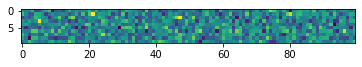

In [140]:
plt.imshow(noise)

In [141]:
images = generator(noise)

In [142]:
images.shape

TensorShape([10, 28, 28])

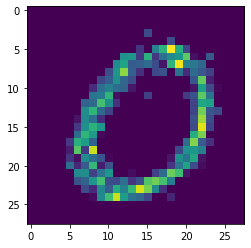

In [143]:
plt.imshow(images[6])
#WARNING the name should be always upda
plt.imsave(fname='images/GAN/zero{}.png'.format(epochs),arr=images[6])

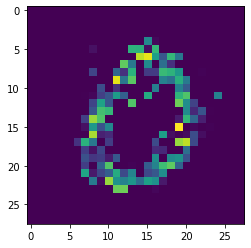

In [76]:
for i in range(len(images)):
    plt.imshow(images[i])
#plt.imsave(fname='images/image2.png',arr=images[1])

In [144]:
len(images)

10

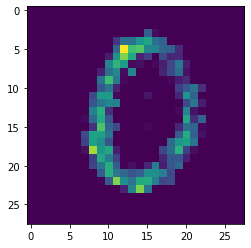

In [151]:
plt.imshow(images[4])